Hello...
use_gpu = 0

numpy complex128 (16 bytes)
resolution = 1_024, size = 16_777_216, size_m = 16.8, natural size = 16.8 MB

numpy complex64 (8 bytes)
resolution = 1_024, size = 8_388_608, size_m = 8.4, natural size = 8.4 MB

numpy float64 (8 bytes)
resolution = 1_024, size = 8_388_608, size_m = 8.4, natural size = 8.4 MB

numpy int32 (4 bytes)
resolution = 1_024, size = 4_194_304, size_m = 4.2, natural size = 4.2 MB


use_gpu = 1

cupy complex128 (16 bytes)
resolution = 1_024, size = 16_777_216, size_m = 16.8, natural size = 16.8 MB

cupy complex64 (8 bytes)
resolution = 1_024, size = 8_388_608, size_m = 8.4, natural size = 8.4 MB

cupy float64 (8 bytes)
resolution = 1_024, size = 8_388_608, size_m = 8.4, natural size = 8.4 MB

cupy int32 (4 bytes)
resolution = 1_024, size = 4_194_304, size_m = 4.2, natural size = 4.2 MB




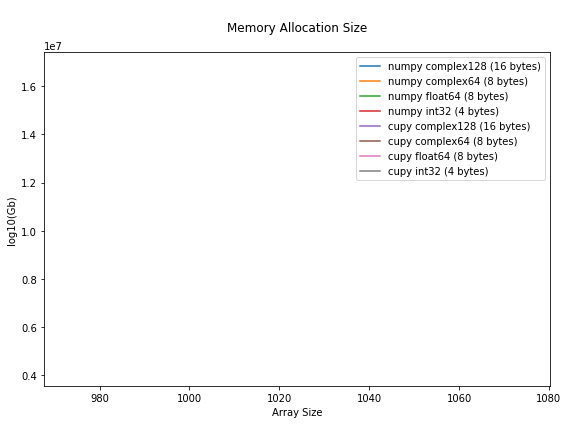

Done.


In [21]:
import numpy 
import cupy
import math
from sys import getsizeof
from humanize import naturalsize
from matplotlib import pyplot as plt

print( "Hello..." )

debug = 1
row_cnt = 1; col_cnt = 1
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 8*col_cnt, 6*row_cnt) )
charts = charts.flatten() if row_cnt*col_cnt > 1 else [charts]
chart_idx = 0 
chart = charts[ chart_idx ]

use_gpus = [0, 1]

for use_gpu in [ 0, 1 ] : 
    print( f"use_gpu = {use_gpu}" )
    print( flush=1 )

    np = cupy if use_gpu else numpy

    data_types = [ np.int_, np.double, np.csingle, np.cdouble ][::-1]

    for data_type in data_types :
        array = np.array( 1, data_type )
        data_type_size = array.nbytes
        
        type_str = f"{data_type}".split( " " )[-1].split(".")[-1].split( "'")[0]
        type_str = [ "numpy ", "cupy "][use_gpu] + type_str
        type_str = f"{type_str } ({data_type_size} bytes)"
        
        print( type_str, flush=1 )
        
        resolutions = []
        memories = []
        label = type_str
        
        res = 9
        no_error = True 
        
        while no_error and res < 20 : 
            try : 
                res += 1
                res = 2**res 
                array = np.zeros( (res, res ), data_type )
                size = array.nbytes
                size_m = size / 10**6 
                debug and print( f"resolution = {res:_}, size = {size:_}, size_m = {size_m:_.1f}, natural size = {naturalsize(size)}", flush=1 )
                
                del array 
                
                resolutions.append( res )
                memories.append( size )
            except  : 
                no_error = False 
            finally :
                pass
            pass
        pass
        
        x =  resolutions
        #x = numpy.log10( numpy.array( resolutions ) )
        y = memories
    
        chart.plot( x, y, label=label )
    
        print( )
    pass

    print()
pass

chart.set_title( "\nMemory Allocation Size\n" )
chart.set_xlabel( "Array Size" )
chart.set_ylabel( "log10(Gb)" )
chart.legend()

plt.tight_layout(); plt.show()

print( "Done." )